# Analytics

#### Date: 2020/02

#### SUMMARY:

- This notebook represents the project quality analysis of the date exposed right above. 

### TEAM:

##### Semester: 2021/02
##### Professor: Hilmer Neri

##### Members:

- 
- 

### LIBRARIES

In [1]:
# Deal with data
import pandas as pd
import numpy as np
import json
from glob import glob
import os

# Deal with API request
import urllib3
from urllib3 import request

# Deal with visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Deal with time
import datetime

### GRAPH SETTINGS

In [2]:
%config InlineBackend.figure_format ='retina'
sns.set(font_scale=1.5)
sns.set_style('darkgrid',
              {'xtick.bottom' : True,
               'ytick.left': True,
               'grid.linestyle':'--',
               'font.monospace': ['Computer Modern Typewriter'],
               'axes.edgecolor' : 'white'})

### DATAFRAME SETTINGS

In [3]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

### SonarCloud

##### Path to the folder with all your jsons

In [8]:
jsons = glob('../analytics-raw-data/*.json') # add your path here

In [9]:
def read_json(json_path):
    
    with open(json_path) as json_file:
        json_obj = json.load(json_file)
        
    return json_obj

def create_base_component_df(json_list):
    
    df = pd.DataFrame()

    for i in json_list:

        base_component = read_json(i)

        base_component_data = base_component['baseComponent']['measures']

        base_component_df = pd.DataFrame(base_component_data)

        base_component_df['filename'] = os.path.basename(i)

        df = df.append(base_component_df, ignore_index=True)
        
    # Replace the UnB semester with yours.
    aux_df = df['filename'].str.split(r"fga-eps-mds-2021.2-(.*?)-(.*?)-(.*?)-(.*?)-v(.*?).json", expand=True)
    print(aux_df)

    df['repository'] = aux_df[3]

    df['version'] = aux_df[5]

    df = df.sort_values(by=['repository', 'version'])
        
    return df

#### Create base component dataframe

In [10]:
len(jsons)

21

In [11]:
base_component_df = create_base_component_df(jsons)

/tmp/ipykernel_49547/2467106830.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(base_component_df, ignore_index=True)
/tmp/ipykernel_49547/2467106830.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(base_component_df, ignore_index=True)
/tmp/ipykernel_49547/2467106830.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(base_component_df, ignore_index=True)
/tmp/ipykernel_49547/2467106830.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(base_component_df, ignore_index=True)
/tmp/ipykernel_49547/2467106830.py:22: FutureWarning: The frame.append method is deprecated 

    0     1               2   3                 4      5 6
0      PUMA      ApiGateway  04  25-2022-20:06:27  2.0.0  
1      PUMA      ApiGateway  04  25-2022-20:06:27  2.0.0  
2      PUMA      ApiGateway  04  25-2022-20:06:27  2.0.0  
3      PUMA      ApiGateway  04  25-2022-20:06:27  2.0.0  
4      PUMA      ApiGateway  04  25-2022-20:06:27  2.0.0  
5      PUMA      ApiGateway  04  25-2022-20:06:27  2.0.0  
6      PUMA      ApiGateway  04  25-2022-20:06:27  2.0.0  
7      PUMA        Frontend  05  03-2022-01:24:51  2.1.0  
8      PUMA        Frontend  05  03-2022-01:24:51  2.1.0  
9      PUMA        Frontend  05  03-2022-01:24:51  2.1.0  
10     PUMA        Frontend  05  03-2022-01:24:51  2.1.0  
11     PUMA        Frontend  05  03-2022-01:24:51  2.1.0  
12     PUMA        Frontend  05  03-2022-01:24:51  2.1.0  
13     PUMA        Frontend  05  03-2022-01:24:51  2.1.0  
14     PUMA  ProjectService  05  04-2022-18:33:33  3.0.0  
15     PUMA  ProjectService  05  04-2022-18:33:33  3.0.0

/tmp/ipykernel_49547/2467106830.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(base_component_df, ignore_index=True)
/tmp/ipykernel_49547/2467106830.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(base_component_df, ignore_index=True)
/tmp/ipykernel_49547/2467106830.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(base_component_df, ignore_index=True)
/tmp/ipykernel_49547/2467106830.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(base_component_df, ignore_index=True)
/tmp/ipykernel_49547/2467106830.py:22: FutureWarning: The frame.append method is deprecated 

In [12]:
base_component_df.head(10)

,metric,value,bestValue,filename,repository,version
28,duplicated_lines_density,0.0,True,fga-eps-mds-2021-2-PUMA-UserService-03-19-2022...,03,1.0.0
29,functions,164,NaN,fga-eps-mds-2021-2-PUMA-UserService-03-19-2022...,03,1.0.0
30,security_rating,1.0,True,fga-eps-mds-2021-2-PUMA-UserService-03-19-2022...,03,1.0.0
31,files,18,NaN,fga-eps-mds-2021-2-PUMA-UserService-03-19-2022...,03,1.0.0
32,complexity,197,NaN,fga-eps-mds-2021-2-PUMA-UserService-03-19-2022...,03,1.0.0
33,ncloc,999,NaN,fga-eps-mds-2021-2-PUMA-UserService-03-19-2022...,03,1.0.0
34,comment_lines_density,0.5,False,fga-eps-mds-2021-2-PUMA-UserService-03-19-2022...,03,1.0.0
35,duplicated_lines_density,0.0,True,fga-eps-mds-2021-2-PUMA-ProjectService-03-19-2...,03,1.0.0
36,functions,154,NaN,fga-eps-mds-2021-2-PUMA-ProjectService-03-19-2...,03,1.0.0
37,security_rating,1.0,True,fga-eps-mds-2021-2-PUMA-ProjectService-03-19-2...,03,1.0.0


#### Create dataframe per file

In [13]:
metric_list = ['files',
               'functions',
               'complexity',
               'comment_lines_density',
               'duplicated_lines_density',
               'coverage',
               'ncloc',
               'tests',
               'test_errors',
               'test_failures',
               'test_execution_time',
               'security_rating']

len(metric_list)

12

In [14]:
def metric_per_file(json):
    
    file_json = []
    
    for component in json['components']:
        if component['qualifier'] == 'FIL':
            file_json.append(component)
            
    return file_json

def generate_file_dataframe_per_release(metric_list, json, language_extension):
    
    df_columns = metric_list
    df = pd.DataFrame(columns = df_columns)
    
    for file in json:
        try:
            if file['language'] == language_extension:
                for measure in file['measures']:
                    df.at[file['path'], measure['metric']] = measure['value']
        except:
            pass
        
    df.reset_index(inplace = True)
    df = df.rename({'index': 'path'}, axis=1).drop(['files'], axis=1)

    return df

def create_file_df(json_list):
    
    df = pd.DataFrame()

    for i in json_list:

        file_component = read_json(i)
        
        file_component_data = metric_per_file(file_component)

        file_component_df = generate_file_dataframe_per_release(metric_list, file_component_data, language_extension = 'js')

        file_component_df['filename'] = os.path.basename(i)

        df = df.append(file_component_df, ignore_index=True)
        
    # Replace the UnB semester with yours.
    aux_df = df['filename'].str.split(r"fga-eps-mds-2021.2-(.*?)-(.*?)-(.*?)-(.*?)-v(.*?).json", expand=True)
    df['repository'] = aux_df[2]

    df['version'] = aux_df[5]

    df = df.sort_values(by=['repository', 'version'])

    return df

In [15]:
file_component_df = create_file_df(jsons)
# file_component_df.iloc[0]

/tmp/ipykernel_49547/3353364515.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(file_component_df, ignore_index=True)
/tmp/ipykernel_49547/3353364515.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(file_component_df, ignore_index=True)
/tmp/ipykernel_49547/3353364515.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(file_component_df, ignore_index=True)
/tmp/ipykernel_49547/3353364515.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(file_component_df, ignore_index=True)
/tmp/ipykernel_49547/3353364515.py:43: FutureWarning: The frame.append method is deprecated 

In [16]:
file_component_df['repository']

526        ApiGateway
527        ApiGateway
528        ApiGateway
529        ApiGateway
530        ApiGateway
531        ApiGateway
532        ApiGateway
533        ApiGateway
534        ApiGateway
535        ApiGateway
536        ApiGateway
537        ApiGateway
538        ApiGateway
539        ApiGateway
540        ApiGateway
188        ApiGateway
189        ApiGateway
190        ApiGateway
191        ApiGateway
192        ApiGateway
193        ApiGateway
194        ApiGateway
195        ApiGateway
196        ApiGateway
197        ApiGateway
198        ApiGateway
199        ApiGateway
200        ApiGateway
201        ApiGateway
202        ApiGateway
203        ApiGateway
204        ApiGateway
345        ApiGateway
346        ApiGateway
347        ApiGateway
348        ApiGateway
349        ApiGateway
350        ApiGateway
351        ApiGateway
352        ApiGateway
353        ApiGateway
354        ApiGateway
355        ApiGateway
356        ApiGateway
357        ApiGateway
358       

In [17]:
file_component_df.iloc[1]

path                              tests/integrationTests/cadastroConstants.js
functions                                                                   0
complexity                                                                  0
comment_lines_density                                                     0.0
duplicated_lines_density                                                  0.0
coverage                                                                  NaN
ncloc                                                                      37
tests                                                                     NaN
test_errors                                                                 0
test_failures                                                               0
test_execution_time                                                       NaN
security_rating                                                           1.0
filename                    fga-eps-mds-2021-2-PUMA-ApiGateway-0

In [18]:
file_component_df.repository.unique()

array(['ApiGateway', 'Frontend', 'ProjectService', 'UserService'],
      dtype=object)

#### Create dataframe per repository

In [19]:
ApiGateway =  file_component_df[file_component_df['repository'] == 'ApiGateway'].fillna(0)
Frontend =  file_component_df[file_component_df['repository'] == 'Frontend'].fillna(0)
ProjectService =  file_component_df[file_component_df['repository'] == 'ProjectService'].fillna(0)
UserService =  file_component_df[file_component_df['repository'] == 'UserService'].fillna(0)



In [20]:
def _ncloc(df):
    ncloc = 0
    for each in df['ncloc']:
        n = 0
        # try to cast the current ncloc value to int, if the value is NaN/Null, consider it as zero.
        try:
            n = int(each)
        except ValueError:
            n = 0
        ncloc += n

    return ncloc

### Measure calculations according Q-Rapids quality model

# Quality Aspect - Maintainability
## Factor - Code Quality

##### COMPLEXITY

In [21]:
def m1(df):
    
    density_non_complex_files = len(df[(df['complexity'].astype(float)/df['functions'].astype(float)) < 10])/len(df)
    
    return density_non_complex_files

##### COMMENTS

In [22]:
def m2(df):
    
    density_comment_files = len(df[(df['comment_lines_density'].astype(float) > 10) & (df['comment_lines_density'].astype(float) < 30)])/len(df)
    
    return density_comment_files

##### DUPLICATIONS

In [23]:
def m3(df):
    
    duplication = len(df[(df['duplicated_lines_density'].astype(float) < 5)])/len(df)
    
    return duplication

# Quality Aspect - Reliability
## Factor - Testing Status

##### Passed tests

In [24]:
def m4(df):
    passed_tests = 0
    if 'test_success_density' in df.columns:
        passed_tests = df['test_success_density'].astype(float).median() / 100
    
    return passed_tests

##### Fast test builds

In [25]:
def m5(df):
    density_fast_test_builds = 0
    if 'test_execution_time' in df.columns and 'tests' in df.columns and sum(df['tests'])!= 0:
        density_fast_test_builds = len(df[(df['test_execution_time'].astype(float)) < 300]) / sum(df['tests'].astype(float))    
    
    return density_fast_test_builds

##### Test coverage

In [26]:
def m6(df):

    density_test_coverage = len(df[(df['coverage'].astype(float) > 60)]) / len(df)

    return density_test_coverage

### Calculate m1, m2, m3, m4, m5 and m6 for each repository

In [27]:
def create_metrics_df(df):
    
    version_vec = df['version'].unique()
    
    m1_list = []
    m2_list = []
    m3_list = []
    m4_list = []
    m5_list = []
    m6_list = []

    ncloc_list = []
    repository_list = []
    version_list = []
    
    metrics_df = pd.DataFrame()
    
    for version in version_vec:

        version_df = df[df['version'] == version]

        m1_list.append(m1(version_df))
        m2_list.append(m2(version_df))
        m3_list.append(m3(version_df))
        m4_list.append(m4(version_df))
        m5_list.append(m5(version_df))
        m6_list.append(m6(version_df))

        ncloc_list.append(_ncloc(version_df))
        repository_list.append(version_df['repository'].iloc[0])
        version_list.append(version)
        
    metrics_df = pd.DataFrame({'m1': m1_list,
                               'm2': m2_list,
                               'm3': m3_list,
                               'm4': m4_list,
                               'm5': m5_list,
                               'm6': m6_list,
                               'repository': repository_list, 
                               'version': version_list,
                               'ncloc': ncloc_list})
        
    return metrics_df

In [ ]:
# ApiGateway =  file_component_df[file_component_df['repository'] == 'ApiGateway'].fillna(0)
# Frontend =  file_component_df[file_component_df['repository'] == 'Frontend'].fillna(0)
# ProjectService =  file_component_df[file_component_df['repository'] == 'ProjectService'].fillna(0)
# UserService =  file_component_df[file_component_df['repository'] == 'UserService'].fillna(0)

In [28]:
ApiGateway_metrics = create_metrics_df(ApiGateway)
Frontend_metrics = create_metrics_df(Frontend)
ProjectService_metrics = create_metrics_df(ProjectService)
UserService_metrics = create_metrics_df(UserService)

### Data visualization

- You must do this for each of your repositories

In [29]:
Frontend_metrics

,m1,m2,m3,m4,m5,m6,repository,version,ncloc
0,0.655172,0.034483,0.931034,0,0,0.0,Frontend,1.0.0,1135
1,0.477273,0.022727,0.931818,0,0,0.0,Frontend,1.1.0,1478
2,0.490566,0.018868,0.943396,0,0,0.0,Frontend,2.0.0,1993
3,0.490566,0.018868,0.943396,0,0,0.0,Frontend,2.1.0,1993
4,0.490566,0.018868,0.943396,0,0,0.0,Frontend,3.0.0,1993


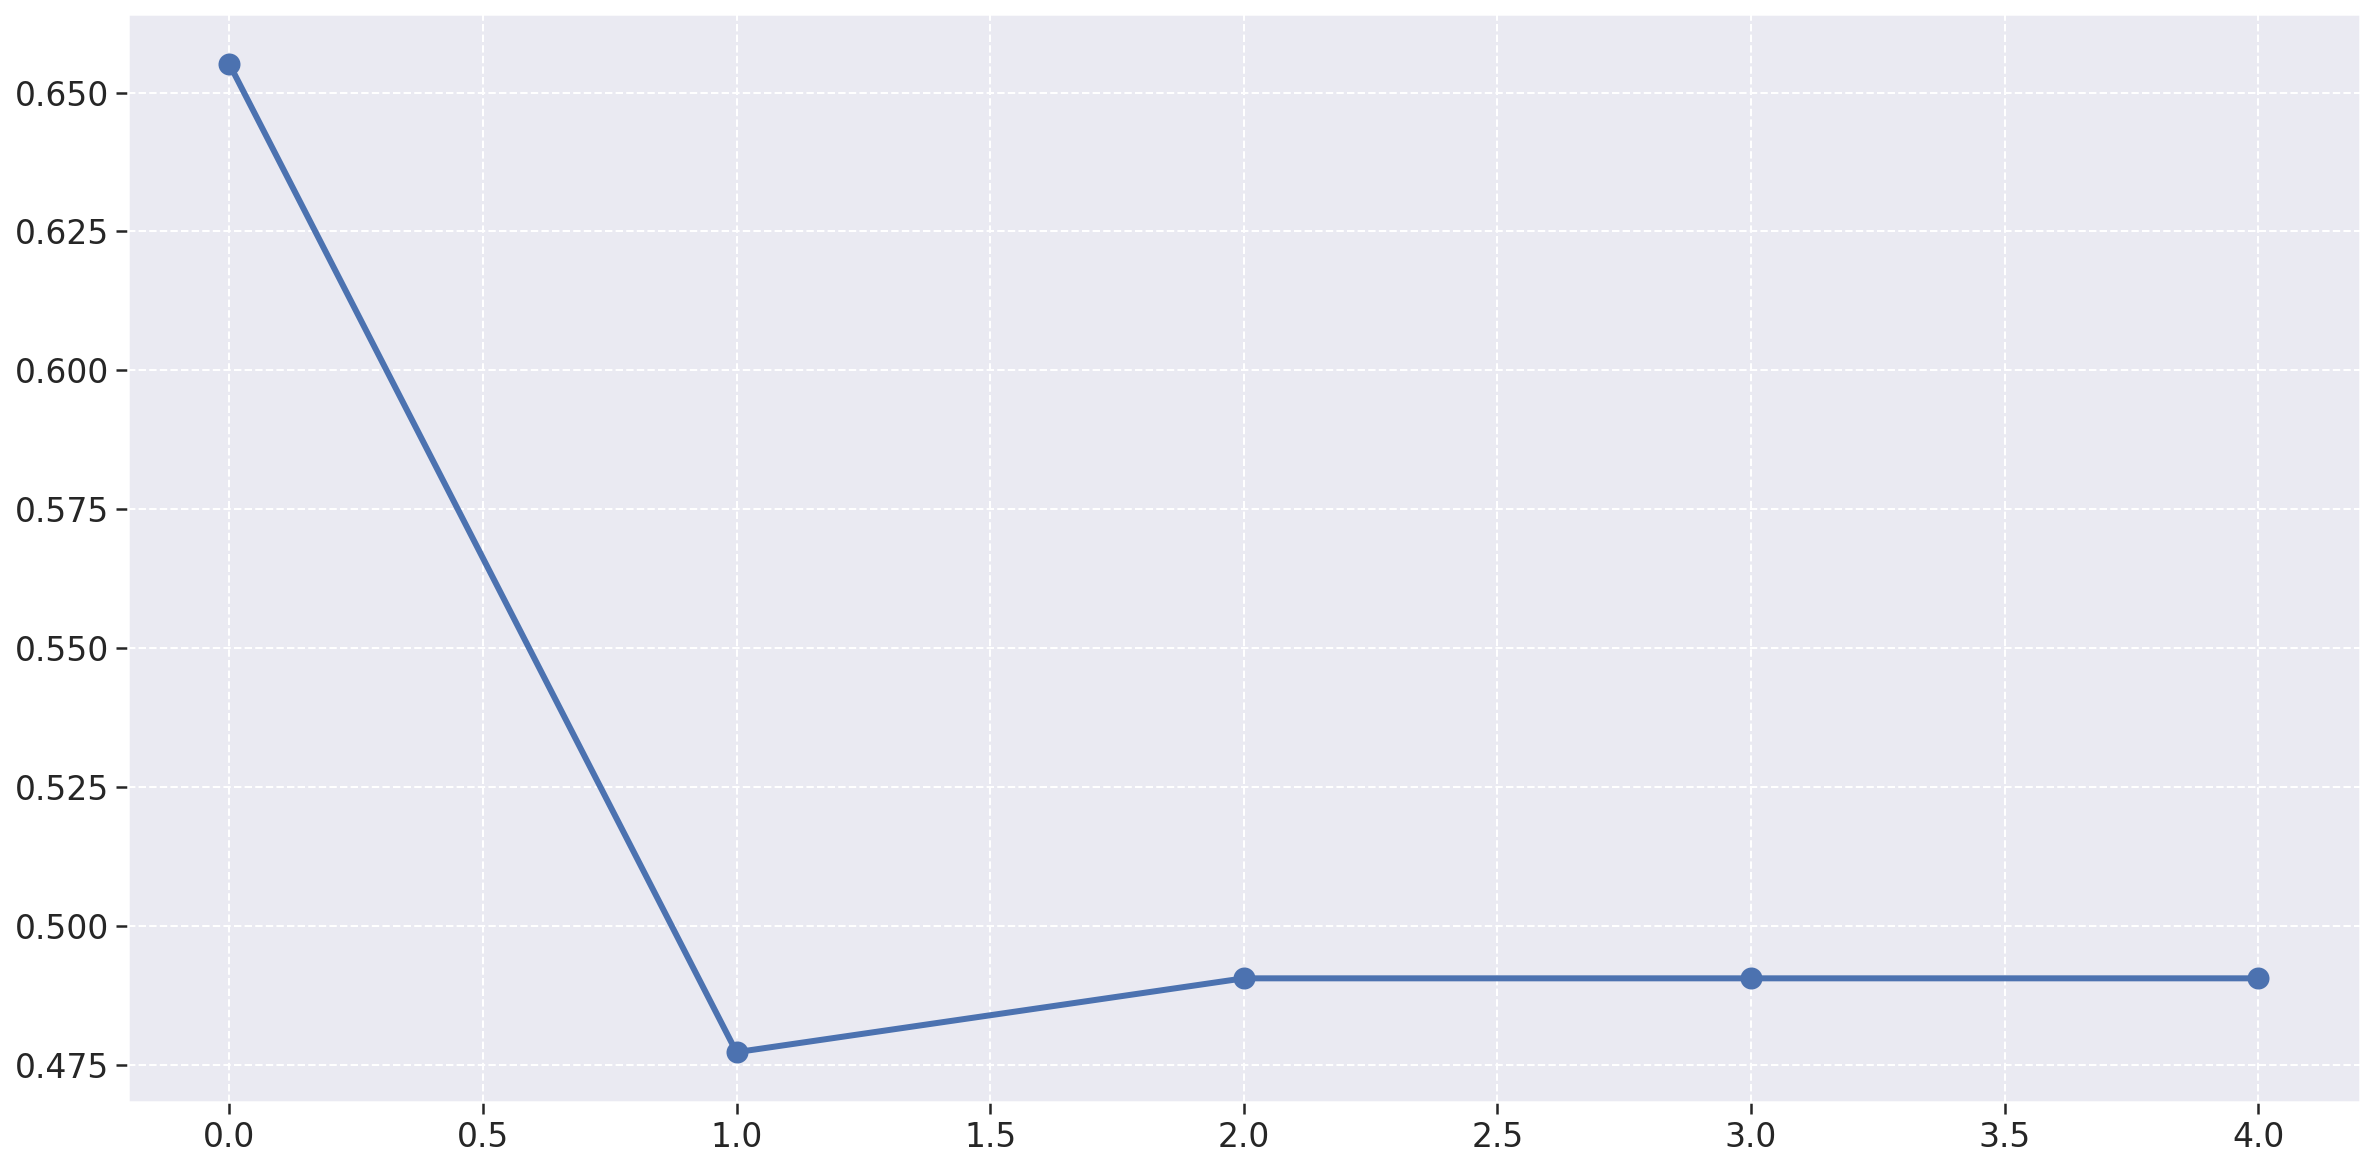

In [30]:
repo_metrics = Frontend_metrics
fig = plt.figure(figsize=(20, 10))

plt.plot(repo_metrics['m1'], linewidth=3, marker='o', markersize=10)
# plt.plot(repo_metrics['m2'], linewidth=3, marker='o', markersize=10)
# plt.plot(repo_metrics['m3'], linewidth=3, marker='o', markersize=10)
# plt.plot(repo_metrics['m6'], linewidth=3, marker='o', markersize=10)

In [31]:
def plot_mx(repo):
    for metric in ['m1', 'm2', 'm3', 'm6']:
        plt.plot(repo[metric], linewidth=3, marker='o', markersize=10)

    

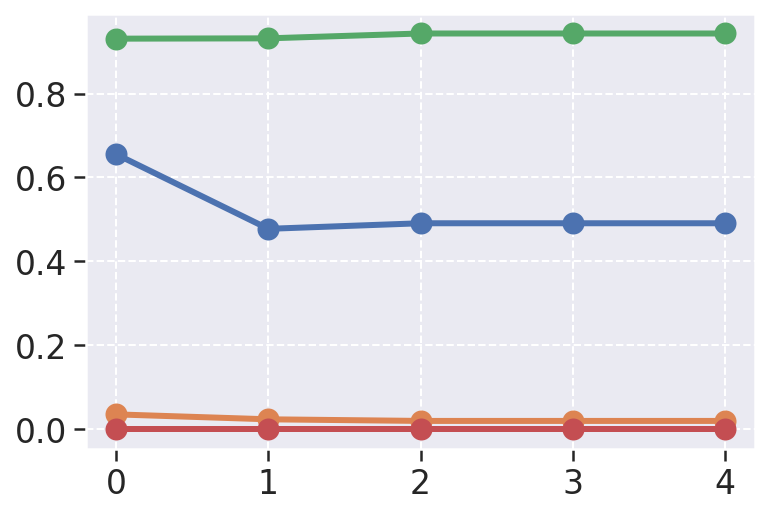

In [32]:
plot_mx(Frontend_metrics)

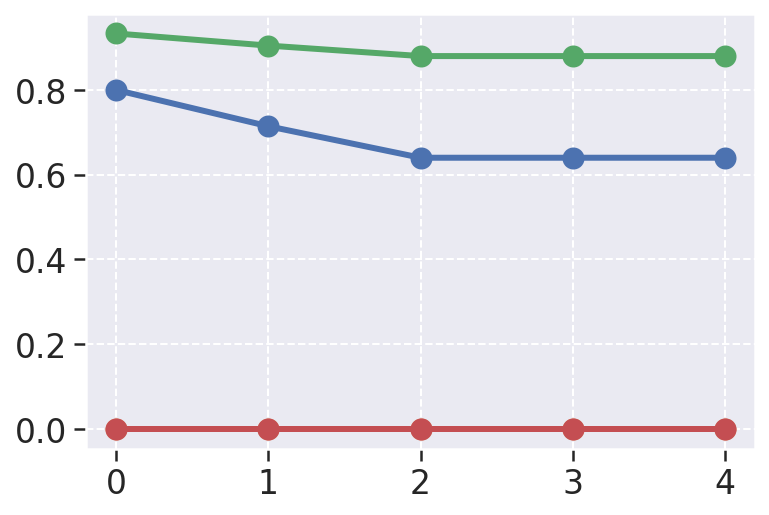

In [33]:
plot_mx(ApiGateway_metrics)

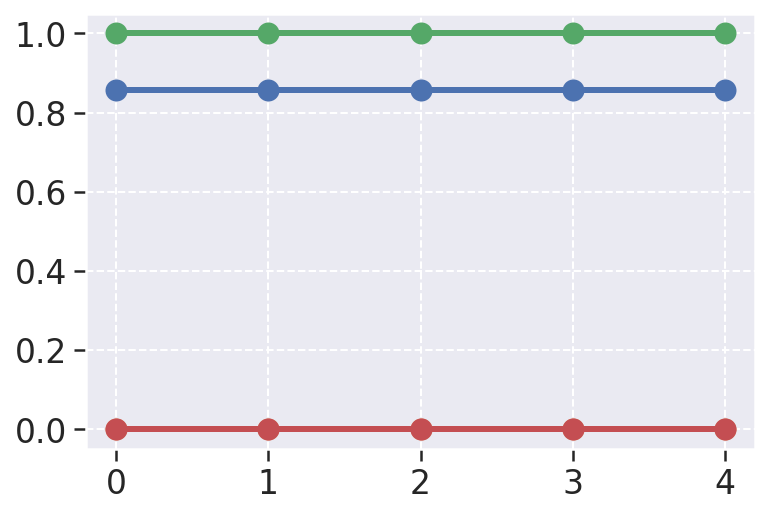

In [34]:
plot_mx(UserService_metrics)

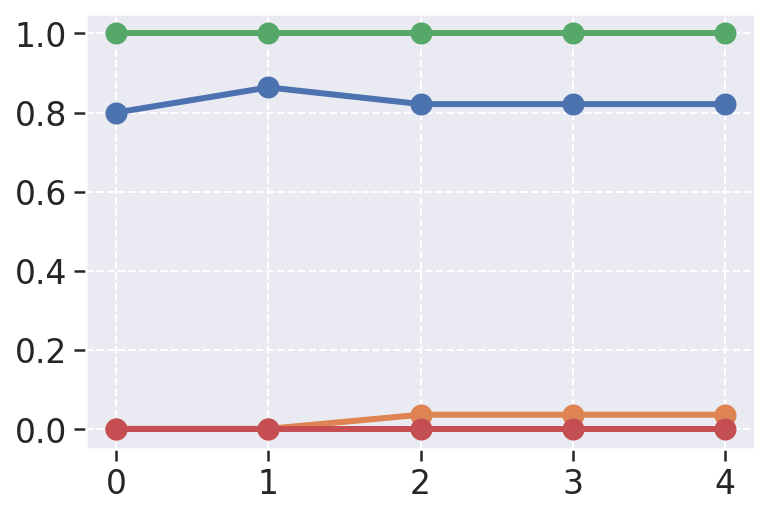

In [35]:
plot_mx(ProjectService_metrics)

### Sub characteristic aggregation

- You must do this for each of your repositories

In [36]:
Frontend_metrics

,m1,m2,m3,m4,m5,m6,repository,version,ncloc
0,0.655172,0.034483,0.931034,0,0,0.0,Frontend,1.0.0,1135
1,0.477273,0.022727,0.931818,0,0,0.0,Frontend,1.1.0,1478
2,0.490566,0.018868,0.943396,0,0,0.0,Frontend,2.0.0,1993
3,0.490566,0.018868,0.943396,0,0,0.0,Frontend,2.1.0,1993
4,0.490566,0.018868,0.943396,0,0,0.0,Frontend,3.0.0,1993


In [37]:
Frontend_metrics['m1']

0    0.655172
1    0.477273
2    0.490566
3    0.490566
4    0.490566
Name: m1, dtype: float64

In [38]:
def code_quality(repo):
    psc1 = 1
    psc2 = 1
    pc1 = 0.5
    pc2 = 0.5
    pm1 = 0.33
    pm2 = 0.33
    pm3 = 0.33
    pm4 = 0.15
    pm5 = 0.15
    pm6 = 0.7
    repo['code_quality'] = ((repo['m1']*pm1) + (repo['m2']*pm2) + (repo['m3']*pm3)) * psc1
    repo['testing_status'] = ((repo['m4']*pm4) + (repo['m5']*pm5) + (repo['m6']*pm6)) * psc2

In [39]:
code_quality(Frontend_metrics)
Frontend_metrics

,m1,m2,m3,m4,m5,m6,repository,version,ncloc,code_quality,testing_status
0,0.655172,0.034483,0.931034,0,0,0.0,Frontend,1.0.0,1135,0.534828,0.0
1,0.477273,0.022727,0.931818,0,0,0.0,Frontend,1.1.0,1478,0.472500,0.0
2,0.490566,0.018868,0.943396,0,0,0.0,Frontend,2.0.0,1993,0.479434,0.0
3,0.490566,0.018868,0.943396,0,0,0.0,Frontend,2.1.0,1993,0.479434,0.0
4,0.490566,0.018868,0.943396,0,0,0.0,Frontend,3.0.0,1993,0.479434,0.0


In [40]:
code_quality(ApiGateway_metrics)
ApiGateway_metrics

,m1,m2,m3,m4,m5,m6,repository,version,ncloc,code_quality,testing_status
0,0.800000,0.0,0.933333,0,0,0.0,ApiGateway,1.0.0,853,0.572000,0.0
1,0.714286,0.0,0.904762,0,0,0.0,ApiGateway,1.1.0,2272,0.534286,0.0
2,0.640000,0.0,0.880000,0,0,0.0,ApiGateway,2.0.0,1309,0.501600,0.0
3,0.640000,0.0,0.880000,0,0,0.0,ApiGateway,2.1.0,1309,0.501600,0.0
4,0.640000,0.0,0.880000,0,0,0.0,ApiGateway,3.0.0,1309,0.501600,0.0


In [41]:
code_quality(UserService_metrics)
UserService_metrics

,m1,m2,m3,m4,m5,m6,repository,version,ncloc,code_quality,testing_status
0,0.857143,0.0,1.0,0,0,0.0,UserService,1.0.0,929,0.612857,0.0
1,0.857143,0.0,1.0,0,0,0.0,UserService,1.1.0,952,0.612857,0.0
2,0.857143,0.0,1.0,0,0,0.0,UserService,2.0.0,967,0.612857,0.0
3,0.857143,0.0,1.0,0,0,0.0,UserService,2.1.0,967,0.612857,0.0
4,0.857143,0.0,1.0,0,0,0.0,UserService,3.0.0,967,0.612857,0.0


In [42]:
code_quality(ProjectService_metrics)
ProjectService_metrics

,m1,m2,m3,m4,m5,m6,repository,version,ncloc,code_quality,testing_status
0,0.800000,0.000000,1.0,0,0,0.0,ProjectService,1.0.0,781,0.594000,0.0
1,0.863636,0.000000,1.0,0,0,0.0,ProjectService,1.1.0,1057,0.615000,0.0
2,0.821429,0.035714,1.0,0,0,0.0,ProjectService,2.0.0,1781,0.612857,0.0
3,0.821429,0.035714,1.0,0,0,0.0,ProjectService,2.1.0,1781,0.612857,0.0
4,0.821429,0.035714,1.0,0,0,0.0,ProjectService,3.0.0,1781,0.612857,0.0


In [44]:
# psc1 = 1
# psc2 = 1
# pc1 = 0.5
# pc2 = 0.5
# pm1 = 0.33
# pm2 = 0.33
# pm3 = 0.33
# pm4 = 0.15
# pm5 = 0.15
# pm6 = 0.7

# ApiGateway['code_quality'] = ((repo1['m1']*pm1) + (repo1['m2']*pm2) + (repo1['m3']*pm3)) * psc1
# repo2['code_quality'] = ((repo2['m1']*pm1) + (repo2['m2']*pm2) + (repo2['m3']*pm3)) * psc1
# ...

# repo1['testing_status'] = ((repo1['m4']*pm4) + (repo1['m5']*pm5) + (repo1['m6']*pm6)) * psc2
# repo2['testing_status'] = ((repo2['m4']*pm4) + (repo2['m5']*pm5) + (repo2['m6']*pm6)) * psc2
# ...

In [50]:
def plot_qt(repo):
    for metric in ['code_quality']:
        plt.plot(repo[metric], linewidth=3, marker='o', markersize=10)

    

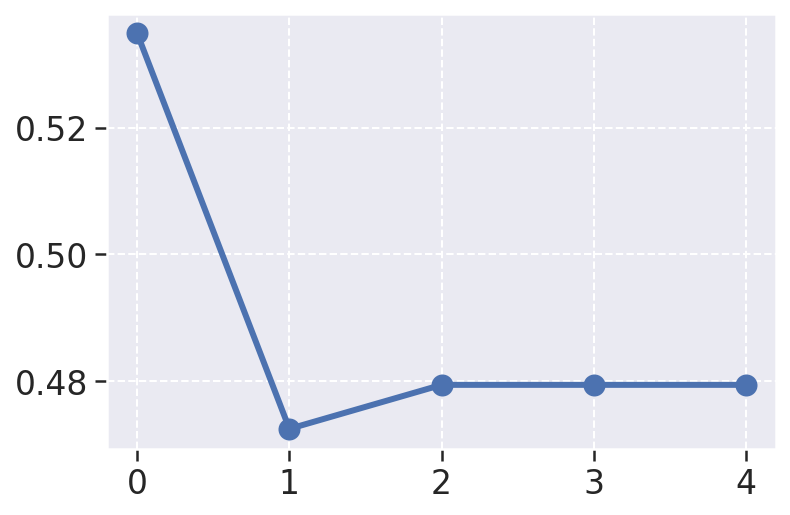

In [51]:
plot_qt(Frontend_metrics)

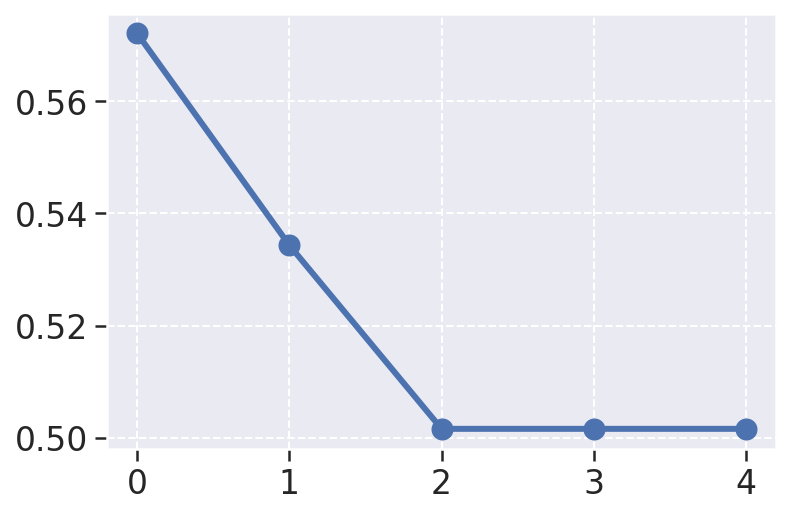

In [52]:
plot_qt(ApiGateway_metrics)

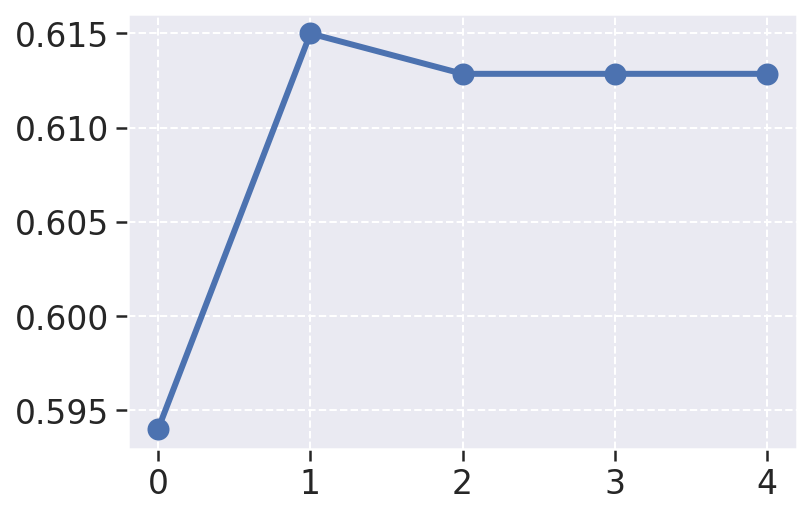

In [53]:
plot_qt(ProjectService_metrics)

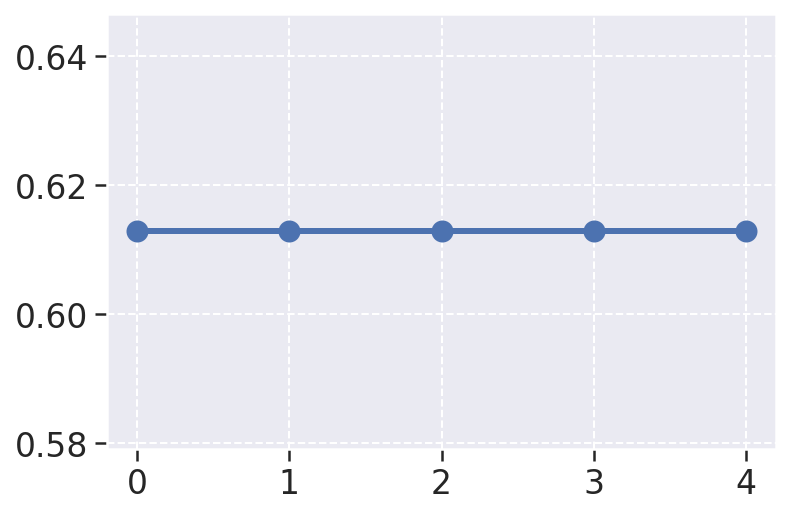

In [54]:
plot_qt(UserService_metrics)

In [56]:
metrics_df = pd.concat([Frontend_metrics, ApiGateway_metrics, ProjectService_metrics, UserService_metrics], ignore_index=True)
pc1 = 0.5
pc2 = 0.5
metrics_df['maintainability'] = metrics_df['code_quality'] * pc1
metrics_df['Reliability'] = metrics_df['testing_status'] * pc2
metrics_df['total'] = metrics_df['maintainability'] + metrics_df['Reliability']

In [57]:
metrics_df

,m1,m2,m3,m4,m5,m6,repository,version,ncloc,code_quality,testing_status,maintainability,Reliability,total
0,0.655172,0.034483,0.931034,0,0,0.0,Frontend,1.0.0,1135,0.534828,0.0,0.267414,0.0,0.267414
1,0.477273,0.022727,0.931818,0,0,0.0,Frontend,1.1.0,1478,0.472500,0.0,0.236250,0.0,0.236250
2,0.490566,0.018868,0.943396,0,0,0.0,Frontend,2.0.0,1993,0.479434,0.0,0.239717,0.0,0.239717
3,0.490566,0.018868,0.943396,0,0,0.0,Frontend,2.1.0,1993,0.479434,0.0,0.239717,0.0,0.239717
4,0.490566,0.018868,0.943396,0,0,0.0,Frontend,3.0.0,1993,0.479434,0.0,0.239717,0.0,0.239717
5,0.800000,0.000000,0.933333,0,0,0.0,ApiGateway,1.0.0,853,0.572000,0.0,0.286000,0.0,0.286000
6,0.714286,0.000000,0.904762,0,0,0.0,ApiGateway,1.1.0,2272,0.534286,0.0,0.267143,0.0,0.267143
7,0.640000,0.000000,0.880000,0,0,0.0,ApiGateway,2.0.0,1309,0.501600,0.0,0.250800,0.0,0.250800
8,0.640000,0.000000,0.880000,0,0,0.0,ApiGateway,2.1.0,1309,0.501600,0.0,0.250800,0.0,0.250800
9,0.640000,0.000000,0.880000,0,0,0.0,ApiGateway,3.0.0,1309,0.501600,0.0,0.250800,0.0,0.250800


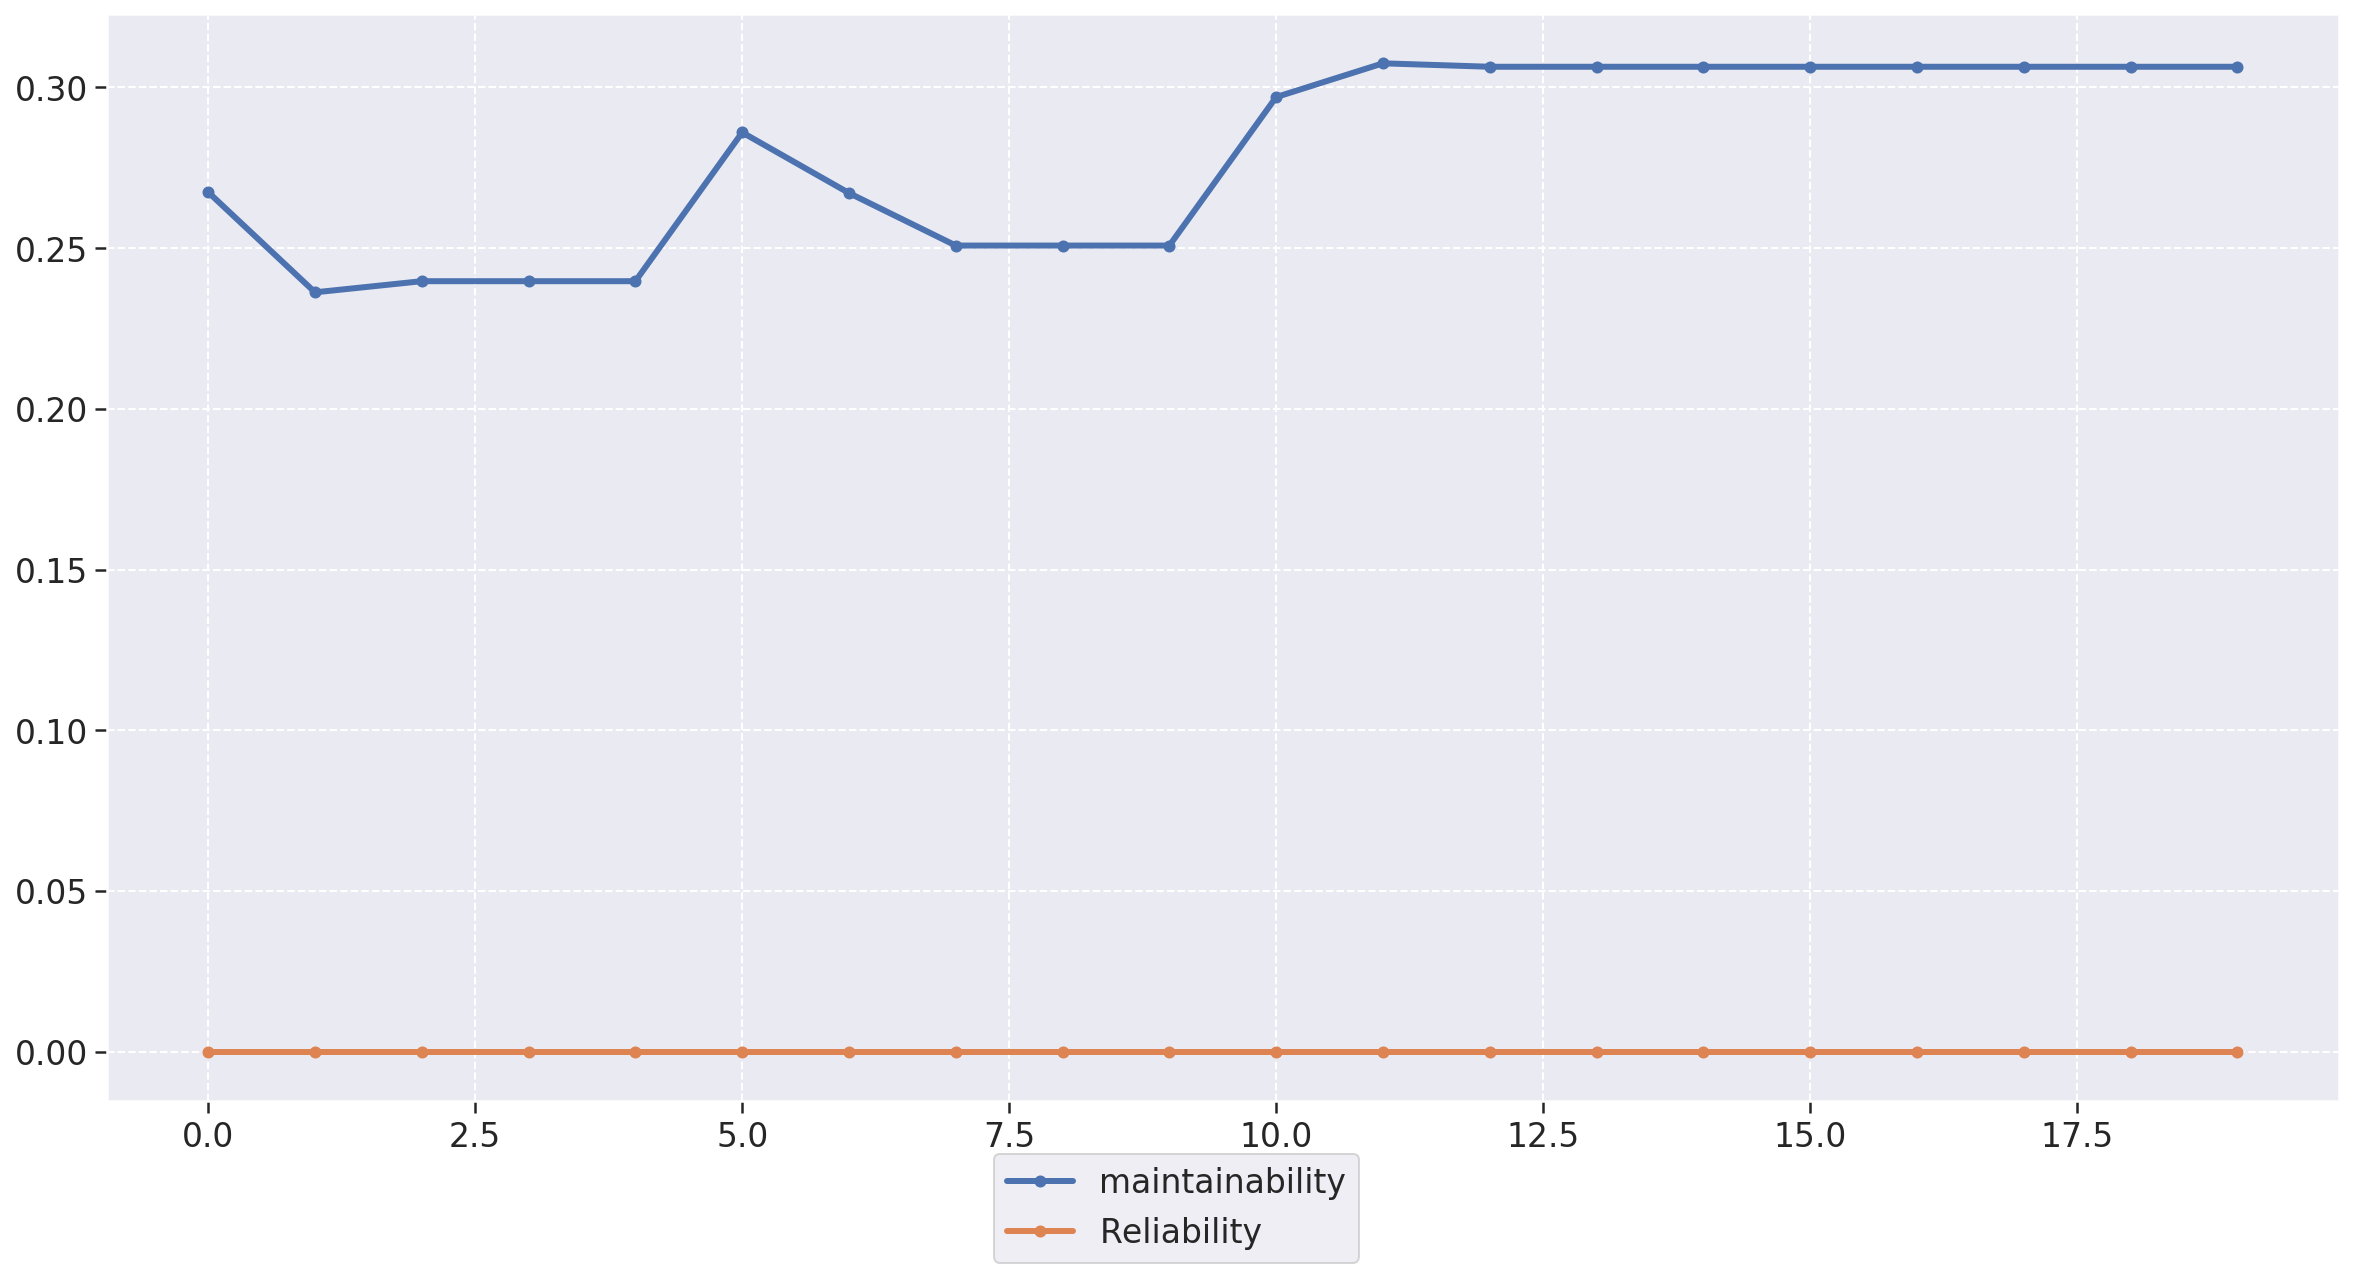

In [58]:
fig = plt.figure(figsize=(20, 10))


plt.plot(metrics_df['maintainability'], linewidth=3, marker='o', markersize=5, label='maintainability')
plt.plot(metrics_df['Reliability'], linewidth=3, marker='o', markersize=5, label='Reliability')
fig.legend(loc='lower center')
# plt.ylim(.45,.7)
plt.show()

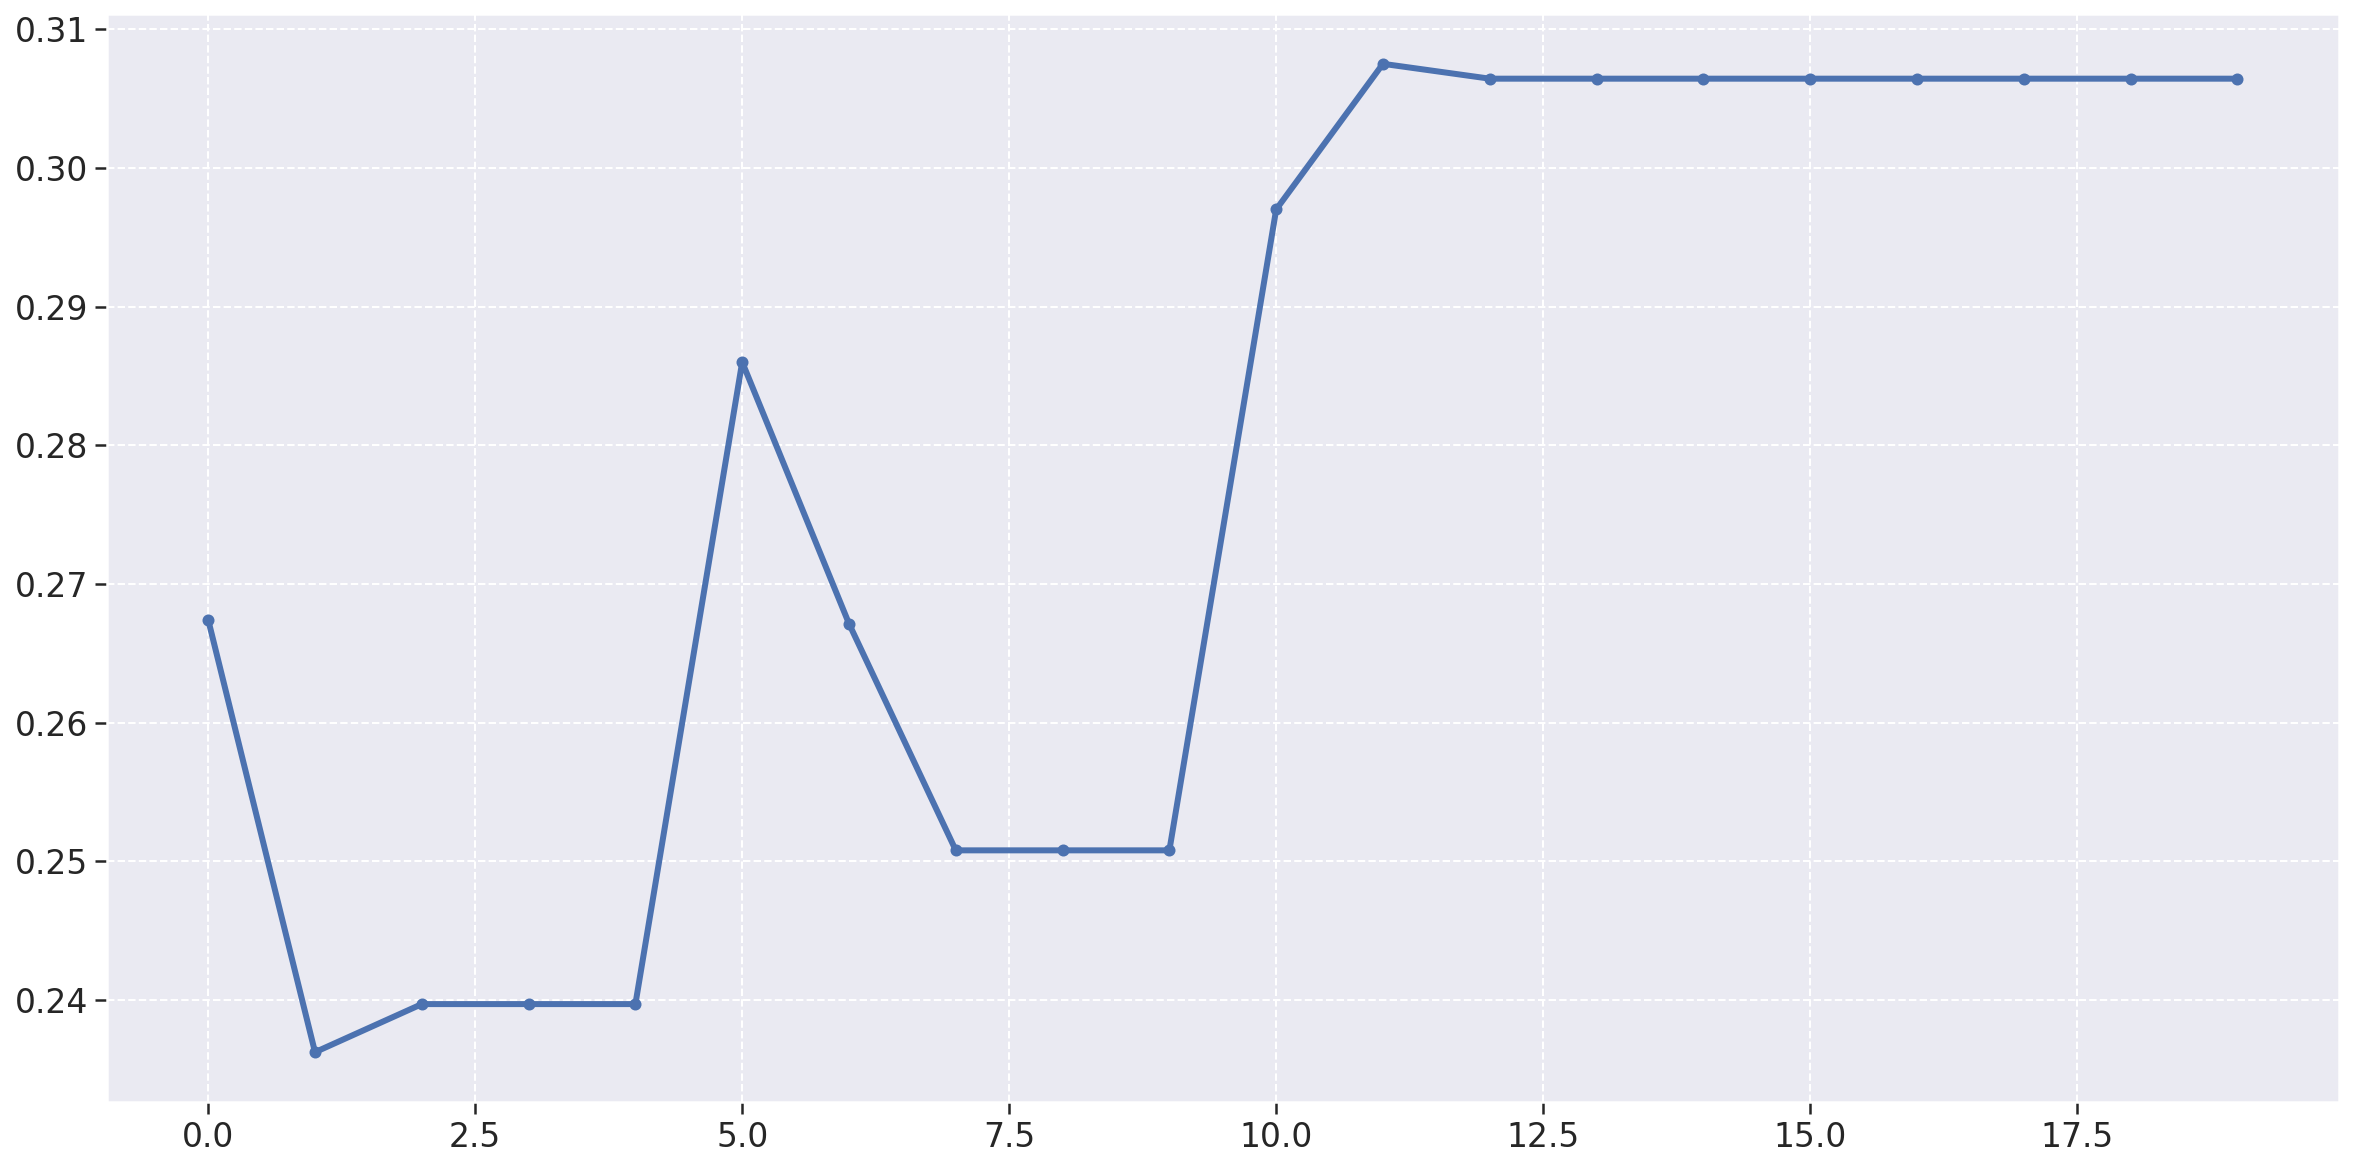

In [59]:
fig = plt.figure(figsize=(20, 10))


plt.plot(metrics_df['total'], linewidth=3, marker='o', markersize=5)


# plt.ylim(.45,.7)
plt.show()

In [65]:
# DATE FORMAT: MM-DD-YYYY-HH:MM:SS
currentDateTime = datetime.datetime.now().strftime("%m-%d-%Y-%H:%M:%S")
metrics_df.to_excel('data/fga-eps-mds-2021_2_UNB-PUMA-{}.xlsx'.format(currentDateTime), index = False)
metrics_df.to_csv('data/fga-eps-mds-2021_2_UNB-PUMA-{}.csv'.format(currentDateTime), index = False)